# HRH Lab

In [19]:
# imports
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
import pandas as pd

## Pulling from Wav file

Lab writeup recommends getting a CSV, but this app is not user freidly, so we're using .wav bc were big boys. 

In [79]:
wav_f = "data/b12c m000.wav"
sample_rate, samples = wavfile.read(wav_f)
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

/Users/clever/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


In [80]:
max(frequencies)

8000.0

In [81]:
spectrogram

array([[5.0288360e-03, 3.6640828e-03, 1.0903465e+00, ..., 1.2310632e-03,
        9.3843907e-02, 1.5646283e-01],
       [3.3895473e+01, 1.7445282e+01, 2.8224138e+01, ..., 6.4286876e+00,
        3.6266632e+00, 1.1507788e+00],
       [2.7984200e+01, 2.3044170e+01, 5.4743126e-02, ..., 2.8385670e+00,
        5.7975917e+00, 5.6187898e-01],
       ...,
       [7.5188535e-03, 1.1073778e-02, 3.0970585e-03, ..., 2.8486620e-03,
        2.8541179e-03, 6.5134112e-03],
       [5.9809182e-03, 4.8677991e-03, 7.3423944e-03, ..., 1.1135122e-03,
        4.5854058e-03, 5.6881583e-03],
       [7.7242416e-04, 1.7559069e-05, 1.8895617e-03, ..., 2.4213734e-05,
        1.1289297e-04, 5.7512033e-04]], dtype=float32)

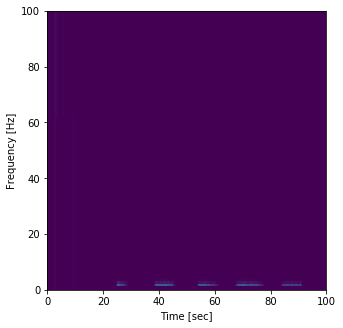

In [133]:
plt.rcParams["figure.figsize"] = (5,10)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram, origin='lower', extent=[0,100,0,100])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.colorbar()
plt.show()

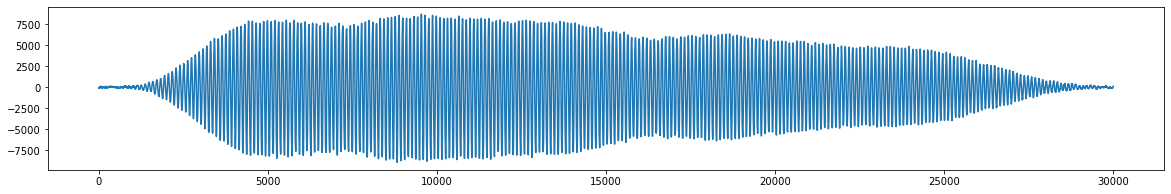

In [52]:
plt.plot(samples[40000:70000])

Plotting the magnitude scale, the resonance peak seems pretty obvious

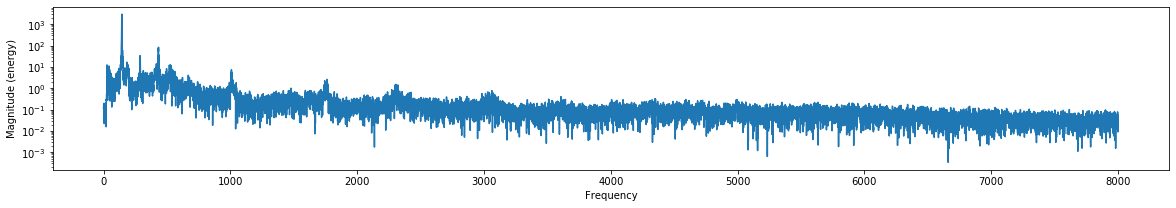

In [53]:
plt.magnitude_spectrum(samples[40000:70000], Fs=sample_rate)
plt.yscale("log")

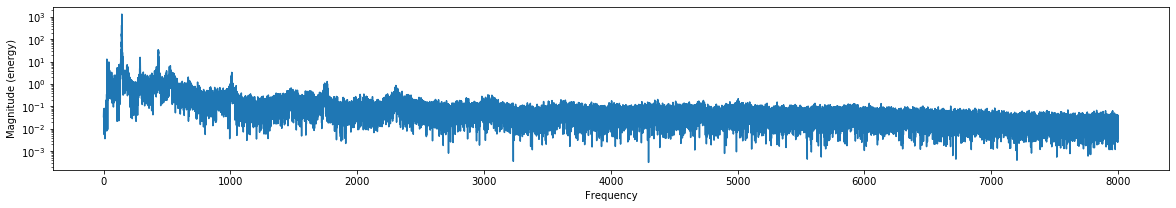

In [48]:
plt.magnitude_spectrum(samples[:100000], Fs=sample_rate)
plt.yscale("log")

In [30]:
times.shape

(1676,)

## pulling from CSV file

csv file is (1025, 321)

I think this is (times, freq) but it is unclear what the frewuencies are. They don't start at the 0th row.

min frequency is 0 max is 8000 on the app, this snapshot seems to be sampling at a frequency less than that. 

is the scaling still in db?

In [304]:
csv_f = "data/b12_m112.csv"

In [305]:
#spec = pd.read_csv(csv_f) # awk
spec_np = np.genfromtxt(csv_f, delimiter=',')
spec_np = spec_np[:,1:]

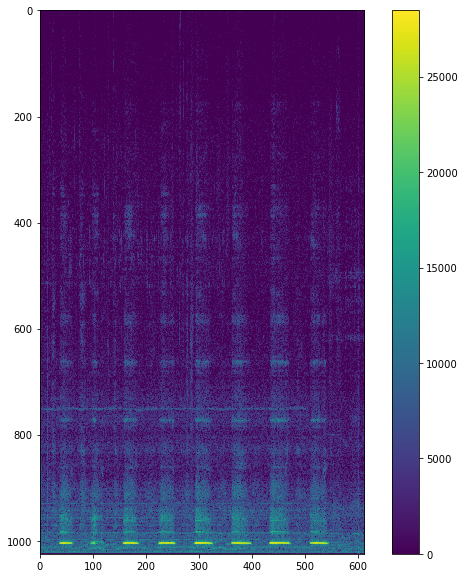

In [307]:
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(spec_np, vmin=0)
plt.colorbar()

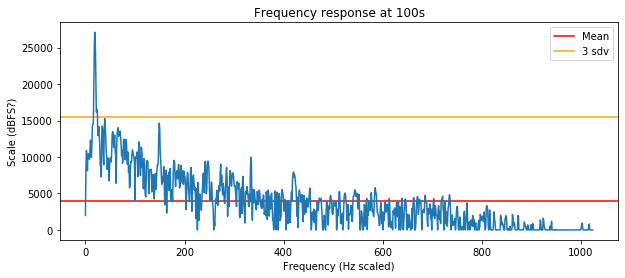

In [221]:
#this looks to be a cut across time, showing us where we were blowing
t = 100

mean_s = np.average(spec_np[:, ])
std_s = np.std(spec_np[:, t])
plt.axhline(mean_s, color="r", label = "Mean")
plt.axhline(mean_s + 3*std_s, color="orange", label = "3 sdv")

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(np.flip(spec_np[:, t]))
plt.xlabel("Frequency (Hz scaled)")
plt.ylabel("Scale (dBFS?)")
plt.title(f"Frequency response at {t}s")
plt.legend()

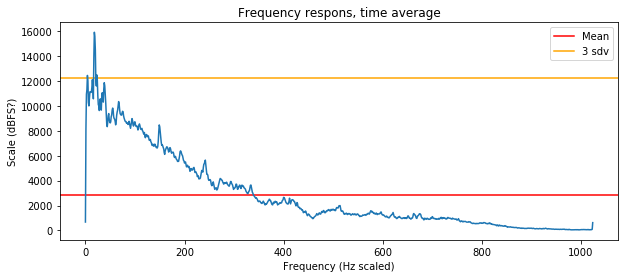

In [222]:
#Averaging over time => find a good starting fq
time_svg = np.average(spec_np, axis = 1)
mean_s = np.average(time_svg)
std_s = np.std(time_svg)

plt.axhline(mean_s, color="r", label = "Mean")
plt.axhline(mean_s + 3*std_s, color="orange", label = "3 sdv")

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(np.flip(time_svg))
plt.xlabel("Frequency (Hz scaled)")
plt.ylabel("Scale (dBFS?)")
plt.title(f"Frequency response, time average")
plt.legend()

In [224]:
# what's the max index?
idx = np.argmax(time_svg)
idx

1006

Text(0.5, 1.0, 'Temporal response at 150Hz')

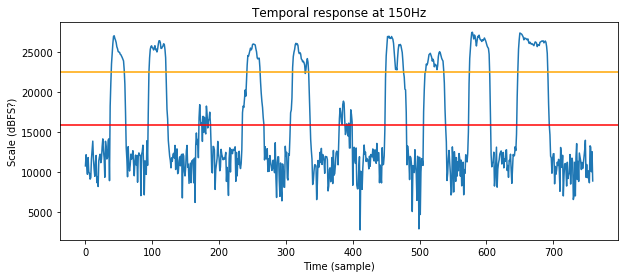

In [233]:
# Given a freq, can find how long we were blowing
#f = 150
#idx = di.csv_indx(f)
mean_s = np.average(spec_np[idx])
std_s = np.std(spec_np[idx])

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(spec_np[idx])
plt.axhline(mean_s, color="r")
plt.axhline(mean_s + std_s, color="orange")
plt.xlabel("Time (sample)")
plt.ylabel("Scale (dBFS?)")
plt.title(f"Temporal response at {f}Hz")

In [237]:
# significant time slices

idxs_filter = np.argwhere(spec_np > mean_s + std_s)
idxs_filter
#plt.imshow(spec_np[idxs_filter], vmin=0)

array([[1004,   40],
       [1004,   41],
       [1004,   42],
       ...,
       [1007,  689],
       [1007,  690],
       [1007,  691]])

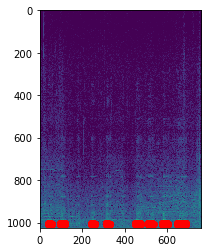

In [242]:
plt.scatter(idxs_filter[:,1], idxs_filter[:,0], color ="r")
plt.imshow(spec_np, vmin=0)

In [289]:
spec_flted = spec_np[:, np.unique(idxs_filter[:,1])]

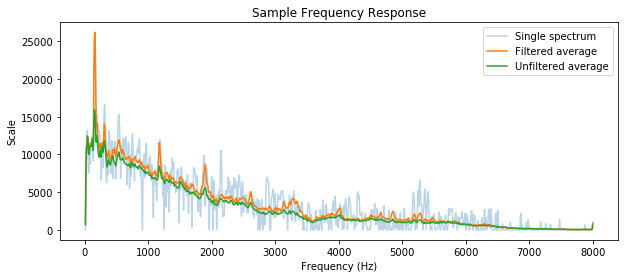

In [293]:
#Averaging over time => find a good starting fq
time_fvg = np.average(spec_flted, axis = 1)
freq = di.csv_fq(np.arange(0, time_fvg.shape[0])).astype(int)
mean_f = np.average(time_fvg)
std_f = np.std(time_fvg)


#plt.axhline(mean_f, color="r", label = "Mean")
#plt.axhline(mean_f + 3*std_f, color="orange", label = "3 sdv")

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(freq, spec_np[:, idxs_filter[0,1]], label = "Single spectrum", alpha =0.3)
plt.plot(freq, time_fvg, label = "Filtered average")
plt.plot(freq, time_svg, label = "Unfiltered average")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Scale")
plt.title(f"Sample Frequency Response")
plt.legend()
plt.savefig("plot/f_demo_rescaling.png", dpi=300)

In [271]:
max_ffeq = np.argmax(time_fvg)
max_sfeq = np.argmax(time_svg)
di.csv_fq(max_ffeq)

156.09756097560975

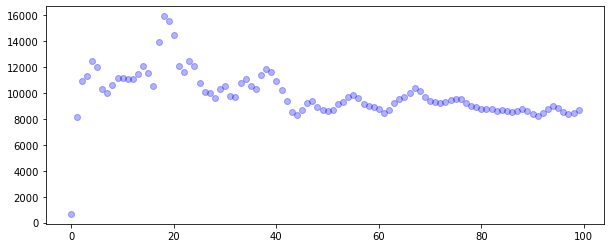

In [269]:
plt.plot(np.flip(time_svg)[:100],'bo', alpha = 0.3, label = "Filtered average")

In [265]:
time_fvg

array([  911.62895928,    80.73755656,    74.36651584, ...,
       10899.83710407,  8111.2081448 ,   904.67873303])

In [272]:
signal.peak_widths(time_svg, [max_sfeq])

(array([89.48802866]),
 array([8288.98421053]),
 array([933.44795419]),
 array([1022.93598286]))

## translation code for the funky variables

In [298]:
import data_info as di
from importlib import reload
reload(di)

<module 'data_info' from '/Users/clever/111b_working/lab_HRH/data_info.py'>

In [153]:
# from index to frequency
di.csv_fq(1005)

156.09756097560975

In [157]:
# from frequency to index
di.csv_indx(156)

1005

(156.09756097560975, array([8.04878589]))